# Dataquest Guided Project
## Popular Data Science Questions

Stack Exchange hosts sites on a multitude of fields and subjects, including mathematics, physics, philosophy, and data science.

Stack Exchange employs a reputation award system for its questions and answers. Each post — each question/answer — is a post that is subject to upvotes and downvotes. This ensures that good posts are easily identifiable.

Being a multidisciplinary field, there a few Stack Exchange websites there are relevant to our goal here:

 - Data Science
 - Cross Validated — a statistics site
 - Artificial Intelligence
 - Mathematics
 - Stack Overflow

And if we want to include Data Engineering, we can also consider:

 - Database Administrators;
 - Unix & Linux;
 - Software Engineering;
 
The fact that DSSE is a data science dedicated site (contrarily to the others), coupled with it having a lot of unanswered questions, makes it an ideal candidate for this investigation. DSSE will be the focus of this guided project.

The result of the query was stored in a file called 2019_questions.csv

### Importing the modules and the dataframe

In [131]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
df = pd.read_csv('2019_questions.csv')

### Understanding the type of each column

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null object
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    1407 non-null float64
dtypes: float64(1), int64(4), object(2)
memory usage: 483.5+ KB


### Counting NaN

In [133]:
df.isna().sum()

Id                  0
CreationDate        0
Score               0
ViewCount           0
Tags                0
AnswerCount         0
FavoriteCount    7432
dtype: int64

In [134]:
df.head(20)

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,<machine-learning><data-mining>,0,NaN
1,44420,2019-01-23 09:34:01,0,25,<machine-learning><regression><linear-regressi...,0,NaN
2,44423,2019-01-23 09:58:41,2,1651,<python><time-series><forecast><forecasting>,0,NaN
3,44427,2019-01-23 10:57:09,0,55,<machine-learning><scikit-learn><pca>,1,NaN
4,44428,2019-01-23 11:02:15,0,19,<dataset><bigdata><data><speech-to-text>,0,NaN
5,44430,2019-01-23 11:13:32,0,283,<fuzzy-logic>,1,NaN
6,44432,2019-01-23 11:17:46,1,214,<time-series><anomaly-detection><online-learning>,0,1.0
7,44436,2019-01-23 12:49:39,0,9,<matrix-factorisation>,0,NaN
8,44437,2019-01-23 13:04:11,0,7,<correlation><naive-bayes-classifier>,0,NaN
9,44438,2019-01-23 13:16:29,0,584,<machine-learning><python><deep-learning><kera...,1,NaN


### Replacing NaN and changing the type of cols for appropiate ones

In [135]:
df['FavoriteCount'].fillna(0, inplace=True)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)
df['Id'] = df['Id'].astype(int)
df['Score'] = df['Score'].astype(int)
df['ViewCount'] = df['ViewCount'].astype(int)
df['AnswerCount'] = df['AnswerCount'].astype(int)
df['FavoriteCount'] = df['FavoriteCount'].astype(int)
df['CreationDate'] = pd.to_datetime(df['CreationDate'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8839 entries, 0 to 8838
Data columns (total 7 columns):
Id               8839 non-null int64
CreationDate     8839 non-null datetime64[ns]
Score            8839 non-null int64
ViewCount        8839 non-null int64
Tags             8839 non-null object
AnswerCount      8839 non-null int64
FavoriteCount    8839 non-null int64
dtypes: datetime64[ns](1), int64(5), object(1)
memory usage: 483.5+ KB


### Replacing Tags for a more appropiate way to count them

In [137]:
#df["Tags"] = df["Tags"].str.replace("<", "")
#df["Tags"] = df["Tags"].str.replace(">", ", ")

df["Tags"] = df["Tags"].str.replace("^<|>$", "").str.split("><")

In [138]:
df.head()

,Id,CreationDate,Score,ViewCount,Tags,AnswerCount,FavoriteCount
0,44419,2019-01-23 09:21:13,1,21,"[machine-learning, data-mining]",0,0
1,44420,2019-01-23 09:34:01,0,25,"[machine-learning, regression, linear-regressi...",0,0
2,44423,2019-01-23 09:58:41,2,1651,"[python, time-series, forecast, forecasting]",0,0
3,44427,2019-01-23 10:57:09,0,55,"[machine-learning, scikit-learn, pca]",1,0
4,44428,2019-01-23 11:02:15,0,19,"[dataset, bigdata, data, speech-to-text]",0,0


### Tag counting

In [139]:
tag_count = dict()

for tags in df["Tags"]:
    for tag in tags:
        if tag in tag_count:
            tag_count[tag] += 1
        else:
            tag_count[tag] = 1

tag_count = pd.DataFrame.from_dict(tag_count, orient = "Index")
tag_count.rename(columns={0: "Count"}, inplace=True)


In [140]:
tag_count.sort_values(by='Count', inplace=True, ascending=False)
tag_count.head(20)

,Count
machine-learning,2693
python,1814
deep-learning,1220
neural-network,1055
keras,935
classification,685
tensorflow,584
scikit-learn,540
nlp,493
cnn,489


In [141]:
most_used = tag_count.sort_values(by="Count").tail(20)
most_used

,Count
machine-learning-model,224
statistics,234
clustering,257
predictive-modeling,265
r,268
dataset,340
regression,347
pandas,354
lstm,402
time-series,466


### Counting by views

In [142]:
tag_view_count = dict()

for index, row in df.iterrows():
    for tag in row['Tags']:
        if tag in tag_view_count:
            tag_view_count[tag] += row['ViewCount']
        else:
            tag_view_count[tag] = row['ViewCount']
            
tag_view_count = pd.DataFrame.from_dict(tag_view_count, orient="index")
tag_view_count.rename(columns={0: "ViewCount"}, inplace=True)

most_viewed = tag_view_count.sort_values(by="ViewCount").tail(20)

### Visualizing in barplots

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7f62a280f6a0>],
      dtype=object)

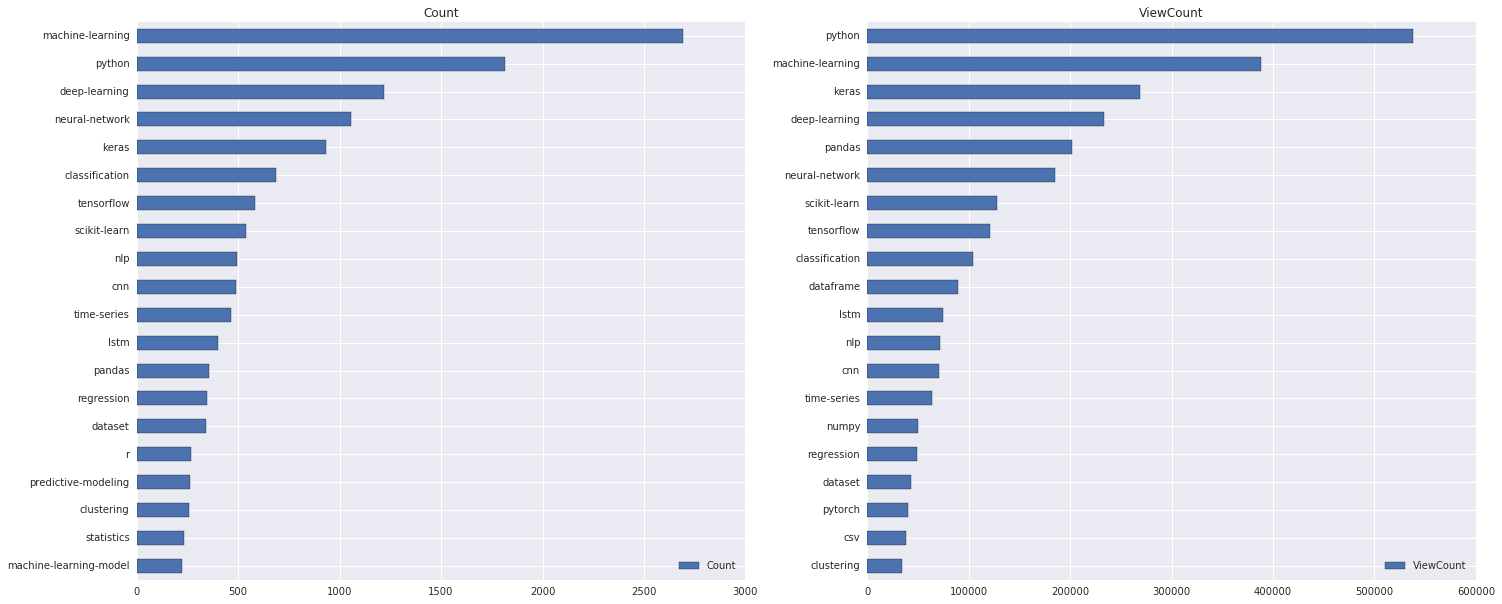

In [143]:
fig, axes = plt.subplots(nrows=1, ncols=2)
fig.set_size_inches((24, 10))
most_used.plot(kind="barh", ax=axes[0], subplots=True)
most_viewed.plot(kind="barh", ax=axes[1], subplots=True)

### Understanding relations between tags

In [144]:
all_tags = list(tag_count.index)

In [145]:
associations = pd.DataFrame(index=all_tags, columns=all_tags)
associations.iloc[0:4,0:4]

,machine-learning,python,deep-learning,neural-network
machine-learning,NaN,NaN,NaN,NaN
python,NaN,NaN,NaN,NaN
deep-learning,NaN,NaN,NaN,NaN
neural-network,NaN,NaN,NaN,NaN


In [146]:
associations.fillna(0, inplace=True)

for tags in df["Tags"]:
    associations.loc[tags, tags] += 1

In [147]:
associations

,machine-learning,python,deep-learning,neural-network,keras,classification,tensorflow,scikit-learn,nlp,cnn,...,open-source,c++,corpus,3d-object-detection,nn,amazon-ml,manifold,proximal-svm,rmsle,hog
machine-learning,2693,499,429,366,195,259,106,188,113,124,...,0,0,0,0,0,0,0,0,0,0
python,499,1814,160,137,280,98,167,235,71,62,...,0,0,0,0,0,0,0,0,0,0
deep-learning,429,160,1220,305,247,59,136,16,72,160,...,0,0,0,1,0,0,1,0,0,0
neural-network,366,137,305,1055,235,65,108,24,24,118,...,0,0,0,0,0,0,0,0,0,0
keras,195,280,247,235,935,58,256,34,23,116,...,0,0,0,0,0,0,1,0,0,0
classification,259,98,59,65,58,685,20,47,35,20,...,0,0,0,0,0,0,0,0,0,0
tensorflow,106,167,136,108,256,20,584,15,11,57,...,0,0,0,0,0,0,0,0,0,0
scikit-learn,188,235,16,24,34,47,15,540,12,0,...,0,0,0,0,0,0,0,0,0,0
nlp,113,71,72,24,23,35,11,12,493,7,...,0,0,1,0,0,0,0,0,0,0
cnn,124,62,160,118,116,20,57,0,7,489,...,0,0,0,0,0,0,0,0,0,0


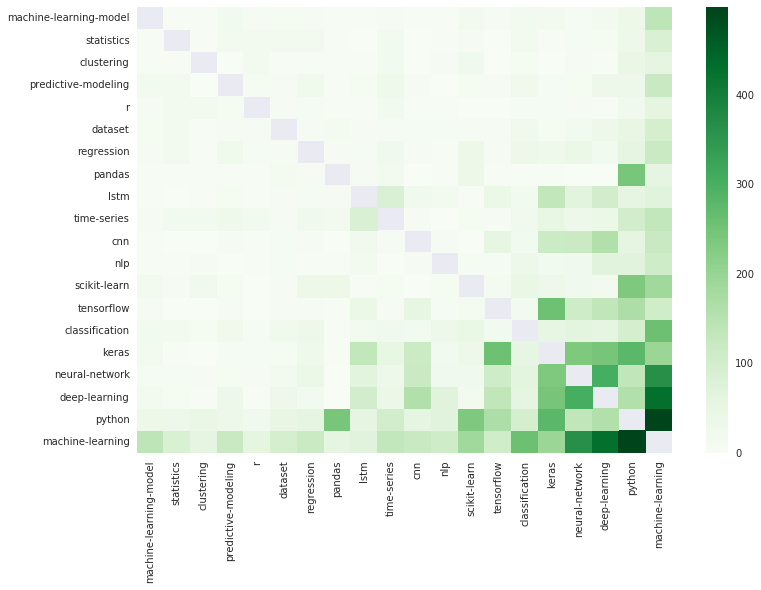

In [148]:
relations_most_used = associations.loc[most_used.index, most_used.index]

for i in range(relations_most_used.shape[0]):
    relations_most_used.iloc[i,i] = pd.np.NaN

plt.figure(figsize=(12,8))
sns.heatmap(relations_most_used, cmap="Greens", annot=False)